This data is provided by World Bank Open Data https://data.worldbank.org/.

In [1]:
import pandas as pd
from pprint import pprint
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

## Part 1: Read, examine and select from WDICountry.csv

In [2]:
# read Country information from '../data/WDICountry.csv' into df_country
df_country = pd.read_csv('WDICountry.csv')

In [3]:
# display the first 5 rows of df_country
df_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2015.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011",NaN,NaN,NaN,2015.0,2000.0
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2015.0,2005.0
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2015.0,2006.0
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,WB-3 code changed from ADO to AND to align wit...,Europe & Central Asia,High income,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2014.0,NaN


In [4]:
# display info for df_country
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 31 columns):
Country Code                                         263 non-null object
Short Name                                           263 non-null object
Table Name                                           263 non-null object
Long Name                                            263 non-null object
2-alpha code                                         261 non-null object
Currency Unit                                        217 non-null object
Special Notes                                        150 non-null object
Region                                               217 non-null object
Income Group                                         217 non-null object
WB-2 code                                            262 non-null object
National accounts base year                          205 non-null object
National accounts reference year                     54 non-null float64
SNA price valuation

In [5]:
# DO NOT CHANGE: columns we will keep from df_country
columns_to_keep = ['Country Code','Short Name','Region','Income Group']

In [6]:
# reduce df_country to only the columns in columns_to_keep and display info for df_country
df_country = df_country[columns_to_keep] 
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 4 columns):
Country Code    263 non-null object
Short Name      263 non-null object
Region          217 non-null object
Income Group    217 non-null object
dtypes: object(4)
memory usage: 8.3+ KB


In [7]:
df_country.head()

,Country Code,Short Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Lower middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income


In [8]:
# display the rows of df_country where 'Region' is null
df_country[df_country.Region.isnull()]

,Country Code,Short Name,Region,Income Group
5,ARB,Arab World,NaN,NaN
34,CEB,Central Europe and the Baltics,NaN,NaN
47,CSS,Caribbean small states,NaN,NaN
59,EAP,East Asia & Pacific (excluding high income),NaN,NaN
60,EAR,Early-demographic dividend,NaN,NaN
61,EAS,East Asia & Pacific,NaN,NaN
62,ECA,Europe & Central Asia (excluding high income),NaN,NaN
63,ECS,Europe & Central Asia,NaN,NaN
66,EMU,Euro area,NaN,NaN
71,EUU,European Union,NaN,NaN


### Question to think about

- How are these rows different?

### Answer: 

- These rows don't represent countries, but show a region or a group of countries instead. 
- Also, if Region is null, Income Group is also null, so we can use dropna directly.


In [9]:
# drop the rows of df_country with null values inplace, and display info for df_country
df_country.dropna(inplace=True)
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 262
Data columns (total 4 columns):
Country Code    217 non-null object
Short Name      217 non-null object
Region          217 non-null object
Income Group    217 non-null object
dtypes: object(4)
memory usage: 8.5+ KB


In [10]:
df_country.head()

,Country Code,Short Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Lower middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income


In [11]:
# assert that there are no duplicates (use len and drop_duplicates)
# hint: what two things should be the same length?
assert len(df_country) == len(df_country.drop_duplicates())

In [12]:
# assert that 'Country Code' is unique (use len and unique)
# hint: again, what two things should be the same length?
assert len(df_country['Country Code']) == len(df_country['Country Code'].unique())

In [13]:
# set the index of df_country to be 'Country Code' inplace and display the first 5 rows
df_country.set_index('Country Code',drop=True,inplace=True)
df_country.head()

,Short Name,Region,Income Group
Country Code,,,
ABW,Aruba,Latin America & Caribbean,High income
AFG,Afghanistan,South Asia,Low income
AGO,Angola,Sub-Saharan Africa,Lower middle income
ALB,Albania,Europe & Central Asia,Upper middle income
AND,Andorra,Europe & Central Asia,High income


In [14]:
# print the number of countries in df_country
n_countries = len(df_country)
print('n_countries: {}'.format(n_countries))

n_countries: 217


---

## Part 2: Read, examine and subset WDIData.csv.zip

In [15]:
# read csv '../data/WDIData.csv.zip' into df_data
df_data = pd.read_csv('D:\WDIData.csv.zip', compression='zip')

In [16]:
# display the first 5 rows of df_data
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [17]:
# display info for df_data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401016 entries, 0 to 401015
Data columns (total 62 columns):
Country Name      401016 non-null object
Country Code      401016 non-null object
Indicator Name    401016 non-null object
Indicator Code    401016 non-null object
1960              34646 non-null float64
1961              38504 non-null float64
1962              40438 non-null float64
1963              40738 non-null float64
1964              41260 non-null float64
1965              44146 non-null float64
1966              43808 non-null float64
1967              45298 non-null float64
1968              45143 non-null float64
1969              46858 non-null float64
1970              79998 non-null float64
1971              86577 non-null float64
1972              89660 non-null float64
1973              89423 non-null float64
1974              90945 non-null float64
1975              95139 non-null float64
1976              97554 non-null float64
1977              101394 non

In [18]:
# pprint a list of the unique values in Indicator Name
pprint(list(df_data.loc[:,'Indicator Name'].unique()))

['2005 PPP conversion factor, GDP (LCU per international $)',
 '2005 PPP conversion factor, private consumption (LCU per international $)',
 'Access to clean fuels and technologies for cooking  (% of population)',
 'Access to electricity (% of population)',
 'Access to electricity, rural (% of rural population)',
 'Access to electricity, urban (% of urban population)',
 'Account (% age 15+) [ts]',
 'Account at a financial institution (% age 15+)',
 'Account at a financial institution, female (% age 15+)',
 'Account at a financial institution, income, poorest 40% (% ages 15+)',
 'Account at a financial institution, income, richest 60% (% ages 15+)',
 'Account at a financial institution, male (% age 15+)',
 'Account, female (% age 15+) [ts]',
 'Account, income, poorest 40% (% ages 15+) [ts]',
 'Account, income, richest 60% (% ages 15+) [ts]',
 'Account, male (% age 15+) [ts]',
 'Account, older adults (% ages 25+) [ts]',
 'Account, primary education or less (% ages 15+) [ts]',
 'Account, 

 'Total amount of debt rescheduled (current US$)',
 'Total change in external debt stocks (current US$)',
 'Total debt service (% of exports of goods, services and primary income)',
 'Total debt service (% of GNI)',
 'Total fisheries production (metric tons)',
 'Total greenhouse gas emissions (% change from 1990)',
 'Total greenhouse gas emissions (kt of CO2 equivalent)',
 'Total natural resources rents (% of GDP)',
 'Total reserves (% of total external debt)',
 'Total reserves (includes gold, current US$)',
 'Total reserves in months of imports',
 'Total reserves minus gold (current US$)',
 'Total tax rate (% of commercial profits)',
 'Trade (% of GDP)',
 'Trade in services (% of GDP)',
 'Trademark applications, direct nonresident',
 'Trademark applications, direct resident',
 'Trademark applications, nonresident, by count',
 'Trademark applications, resident, by count',
 'Trademark applications, total',
 'Trained teachers in lower secondary education (% of total teachers)',
 'Trained

In [19]:
# DO NOT CHANGE: these are the indicators we will keep
data_indicators_to_keep = ['Access to electricity (% of population)','GDP (constant 2010 US$)','Population, total','Population density (people per sq. km of land area)','Unemployment, total (% of total labor force) (national estimate)']

In [20]:
# DO NOT CHANGE: these are the columns we will keep
data_columns_to_keep = ['Country Code','Indicator Name','2014']

In [21]:
# reduce data to only 
#  the rows whose 'Indicator Name' isin data_indicators_to_keep and 
#  the columns in data_columns_to_keep
df_data = df_data.loc[df_data['Indicator Name'].isin(data_indicators_to_keep),data_columns_to_keep]

In [22]:
df_data.head()

,Country Code,Indicator Name,2014
3,ARB,Access to electricity (% of population),8.803912e+01
508,ARB,GDP (constant 2010 US$),2.450387e+12
1075,ARB,Population density (people per sq. km of land ...,2.863455e+01
1084,ARB,"Population, total",3.900430e+08
1480,ARB,"Unemployment, total (% of total labor force) (...",NaN


In [23]:
# display the info for df_data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 3 to 400977
Data columns (total 3 columns):
Country Code      1320 non-null object
Indicator Name    1320 non-null object
2014              1166 non-null float64
dtypes: float64(1), object(2)
memory usage: 41.2+ KB


In [24]:
# into df_data_pivot, pivot df_data with index 'Country Code', columns 'Indicator Name' and values '2014'
# and display the first 5 rows
df_data_pivot = df_data.pivot(index='Country Code',columns='Indicator Name',values='2014')
df_data_pivot.head()

Indicator Name,Access to electricity (% of population),GDP (constant 2010 US$),Population density (people per sq. km of land area),"Population, total","Unemployment, total (% of total labor force) (national estimate)"
Country Code,,,,,
ABW,94.468323,NaN,576.638889,103795.0,NaN
AFG,89.500000,1.999032e+10,50.176179,32758020.0,NaN
AGO,32.000000,1.008863e+11,21.593379,26920466.0,NaN
ALB,100.000000,1.276823e+10,105.441752,2889104.0,17.49
AND,100.000000,NaN,168.559574,79223.0,NaN


In [25]:
# display info for df_data_pivot
df_data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, ABW to ZWE
Data columns (total 5 columns):
Access to electricity (% of population)                             260 non-null float64
GDP (constant 2010 US$)                                             239 non-null float64
Population density (people per sq. km of land area)                 261 non-null float64
Population, total                                                   262 non-null float64
Unemployment, total (% of total labor force) (national estimate)    144 non-null float64
dtypes: float64(5)
memory usage: 12.4+ KB


## Part 3: Join the two datasets

In [26]:
# set df as the inner join df_country with df_data_pivot and display the first 5 rows
df = df_country.join(df_data_pivot, how='inner')
df.head()

,Short Name,Region,Income Group,Access to electricity (% of population),GDP (constant 2010 US$),Population density (people per sq. km of land area),"Population, total","Unemployment, total (% of total labor force) (national estimate)"
Country Code,,,,,,,,
ABW,Aruba,Latin America & Caribbean,High income,94.468323,NaN,576.638889,103795.0,NaN
AFG,Afghanistan,South Asia,Low income,89.500000,1.999032e+10,50.176179,32758020.0,NaN
AGO,Angola,Sub-Saharan Africa,Lower middle income,32.000000,1.008863e+11,21.593379,26920466.0,NaN
ALB,Albania,Europe & Central Asia,Upper middle income,100.000000,1.276823e+10,105.441752,2889104.0,17.49
AND,Andorra,Europe & Central Asia,High income,100.000000,NaN,168.559574,79223.0,NaN


In [27]:
# display info for df (are there the right number of rows, the same as number of countries?)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, ABW to ZWE
Data columns (total 8 columns):
Short Name                                                          217 non-null object
Region                                                              217 non-null object
Income Group                                                        217 non-null object
Access to electricity (% of population)                             214 non-null float64
GDP (constant 2010 US$)                                             193 non-null float64
Population density (people per sq. km of land area)                 215 non-null float64
Population, total                                                   216 non-null float64
Unemployment, total (% of total labor force) (national estimate)    113 non-null float64
dtypes: float64(5), object(3)
memory usage: 15.3+ KB


## Part 4: Analysis and visualization

In [28]:
# display the value counts for Region
df['Region'].value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [29]:
# display summary stats (means and quartiles) for 'Access to electricity'
df['Access to electricity (% of population)'].describe()

count    214.000000
mean      82.149974
std       28.889603
min        4.530425
25%       72.471842
50%       99.800000
75%      100.000000
max      100.000000
Name: Access to electricity (% of population), dtype: float64

In [30]:
# group by 'Region' and show the means of 'Access to electricity' for each region
df.groupby('Region')['Access to electricity (% of population)'].mean()

Region
East Asia & Pacific            84.033126
Europe & Central Asia          99.996312
Latin America & Caribbean      95.247462
Middle East & North Africa     95.351902
North America                 100.000000
South Asia                     88.211918
Sub-Saharan Africa             40.455854
Name: Access to electricity (% of population), dtype: float64

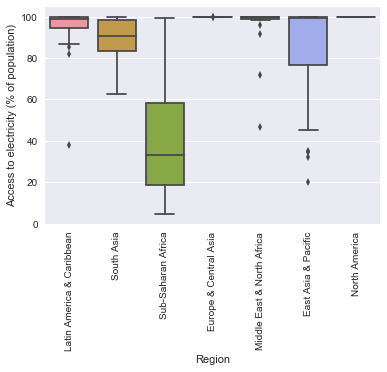

In [31]:
# use seaborn to display box plots of 'Access to electricity' for each region
sns.boxplot(x='Region',y='Access to electricity (% of population)',data=df)
# rotate x-axis tick labels by 90 degrees
_ = plt.xticks(rotation=90)

In [32]:
# into df_region_dummies, create a dummies matrix for region, with prefix 'Region', dropping the first region value
# and display the first 5 rows
df_region_dummies = pd.get_dummies(df['Region'] , prefix='Region', drop_first=True)
df_region_dummies.head()

,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
Country Code,,,,,,
ABW,0,1,0,0,0,0
AFG,0,0,0,0,1,0
AGO,0,0,0,0,0,1
ALB,1,0,0,0,0,0
AND,1,0,0,0,0,0


In [33]:
# join df with df_region_dummies and store in df
df = df.join(df_region_dummies, how='inner')

In [34]:
# show first 5 rows of df
df.head()

,Short Name,Region,Income Group,Access to electricity (% of population),GDP (constant 2010 US$),Population density (people per sq. km of land area),"Population, total","Unemployment, total (% of total labor force) (national estimate)",Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
Country Code,,,,,,,,,,,,,,
ABW,Aruba,Latin America & Caribbean,High income,94.468323,NaN,576.638889,103795.0,NaN,0,1,0,0,0,0
AFG,Afghanistan,South Asia,Low income,89.500000,1.999032e+10,50.176179,32758020.0,NaN,0,0,0,0,1,0
AGO,Angola,Sub-Saharan Africa,Lower middle income,32.000000,1.008863e+11,21.593379,26920466.0,NaN,0,0,0,0,0,1
ALB,Albania,Europe & Central Asia,Upper middle income,100.000000,1.276823e+10,105.441752,2889104.0,17.49,1,0,0,0,0,0
AND,Andorra,Europe & Central Asia,High income,100.000000,NaN,168.559574,79223.0,NaN,1,0,0,0,0,0


In [36]:
# write out the new dataframe to 'country_electricity_by_region.csv'
df.to_csv('country_electricity_by_region.csv')